In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data = pd.read_csv("heart.csv")
X = data.drop("target", axis=1)
y = data["target"]
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Akurasi: 0.73
Precision: 0.73
Recall: 0.74


In [ ]:
# Menentukan K-Optimal

In [ ]:
k_range = range(1, 21)
cv_scores = []

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

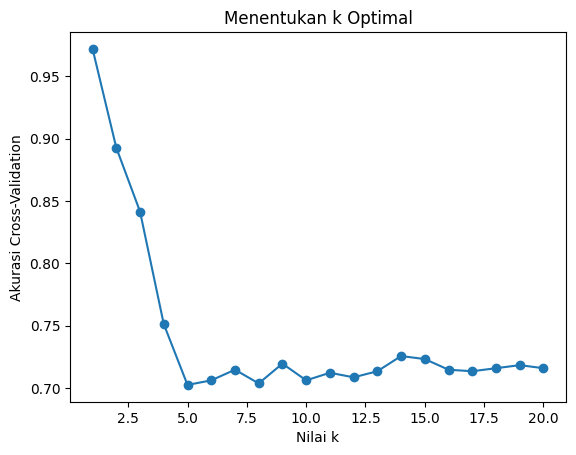

In [ ]:
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Menentukan k Optimal')
plt.show()

In [ ]:
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print("Nilai k optimal:", optimal_k)

Nilai k optimal: 1


In [ ]:
#Analisis Overfitting/Underfitting

In [ ]:
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f"Akurasi Train: {train_acc:.2f}, Akurasi Test: {test_acc:.2f}")

if train_acc > test_acc:
    print("Model Overfit")
else:
    print("Model Underfit")


Akurasi Train: 0.92, Akurasi Test: 0.73
Model Overfit
